# CLUSTERING - K-MEANS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [2]:
pp_train = pd.read_csv("pp_train.csv")
pp_train.head()

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,totalImages,totalVideos,totalCredits,...,is_War,is_Horror,is_Animation,fill_runtimeMinutes,is_from_Oceania,is_from_North America,is_from_South America,is_from_Asia,is_from_Africa,is_from_Europe
0,Neogenic Nightmare Chapter 3: Hydro-Man,8,1995,NaN,NaN,0.0,779,1,0,21,...,0,0,1,40.0,0,1,0,0,0,0
1,Looping,6,1982,NaN,NaN,0.0,11,1,0,1,...,0,0,0,28.0,0,0,0,0,0,1
2,Idealnaya para,6,1992,NaN,NaN,0.0,38,1,0,24,...,0,0,0,90.0,0,0,0,0,0,1
3,MasterChef Celebrity México,6,2021,NaN,NaN,0.0,15,22,0,56,...,0,0,0,31.0,0,1,0,0,0,0
4,Seutateueob,8,2020,2020.0,80.0,1.0,15718,347,2,47,...,0,0,0,80.0,0,0,0,1,0,0


In [3]:
pp_train.columns

Index(['originalTitle', 'rating', 'startYear', 'endYear', 'runtimeMinutes',
       'awardWins', 'numVotes', 'totalImages', 'totalVideos', 'totalCredits',
       'criticReviewsTotal', 'titleType', 'awardNominationsExcludeWins',
       'canHaveEpisodes', 'isAdult', 'numRegions', 'userReviewsTotal',
       'is_Documentary', 'is_History', 'is_Adventure', 'is_Thriller',
       'is_Game-Show', 'is_Comedy', 'is_Sci-Fi', 'is_Romance', 'is_Biography',
       'is_Musical', 'is_Western', 'is_Music', 'is_Film-Noir', 'is_Adult',
       'is_Reality-TV', 'is_News', 'is_Action', 'is_Crime', 'is_Short',
       'is_Fantasy', 'is_Family', 'is_Mystery', 'is_Talk-Show', 'is_Drama',
       'is_Sport', 'is_War', 'is_Horror', 'is_Animation',
       'fill_runtimeMinutes', 'is_from_Oceania', 'is_from_North America',
       'is_from_South America', 'is_from_Asia', 'is_from_Africa',
       'is_from_Europe'],
      dtype='object')

### Definizione delle feature numeriche da usare per clustering

In [4]:
numeric = pp_train[["startYear", "numVotes", "totalImages", "totalCredits", "criticReviewsTotal", 
                    "numRegions", "userReviewsTotal", "fill_runtimeMinutes"]].values

#da qui escludiamo endYear perchè ha dei NaN e k-means non sa gestirli
#inizio a eliminare qualche var ---> ["awardWins", "totalVideos", "awardNominationsExcludeWins", 

In [5]:
zero_counts = (pp_train == 0).sum()
zero_counts

originalTitle                      0
rating                             0
startYear                          0
endYear                            0
runtimeMinutes                     1
awardWins                      14589
numVotes                           0
totalImages                     3290
totalVideos                    14821
totalCredits                     117
criticReviewsTotal             11439
titleType                          0
awardNominationsExcludeWins    14427
canHaveEpisodes                14832
isAdult                        16005
numRegions                         0
userReviewsTotal                9229
is_Documentary                 14596
is_History                     16076
is_Adventure                   14833
is_Thriller                    15646
is_Game-Show                   16181
is_Comedy                      11669
is_Sci-Fi                      15982
is_Romance                     15048
is_Biography                   16154
is_Musical                     16203
i

### Log-transformation delle variabili numeriche

In [6]:
X_numeric_log = np.log1p(numeric)
#data_log = np.log1p(numeric)
#X_numeric_log = data_log.values
#X = pp_train.iloc[:,:].values ---> questo comodo se nel dataset avessimo solo var numeriche

### Normalizzazione con z-score e minmax

In [7]:
scaler = StandardScaler() 
scaler.fit(X_numeric_log) #x è la numpy matrix of the dataset
X_scal = scaler.transform(X_numeric_log)

In [8]:
scaler = MinMaxScaler()
X_minmax = scaler.fit_transform(X_numeric_log)

### Choice of the optimal number of clusters

il ciclo for su k permette di identificare il best number of clusters da utilizzare nell'algoritmo; lo si trova vedendo SSE e silhouette

In [9]:
sse_list = []

for k in range(2, 51):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(X_scal) 
    #kmeans.fit(X_minmax) 
    sse_list.append(kmeans.inertia_)

In [10]:
sil_list = []

for k in range(2, 51):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(X_scal)
    #kmeans.fit(X_minmax) 
    sil_list.append(silhouette_score(X_scal, kmeans.labels_))
    #sil_list.append(silhouette_score(X_minmax, kmeans.labels_))

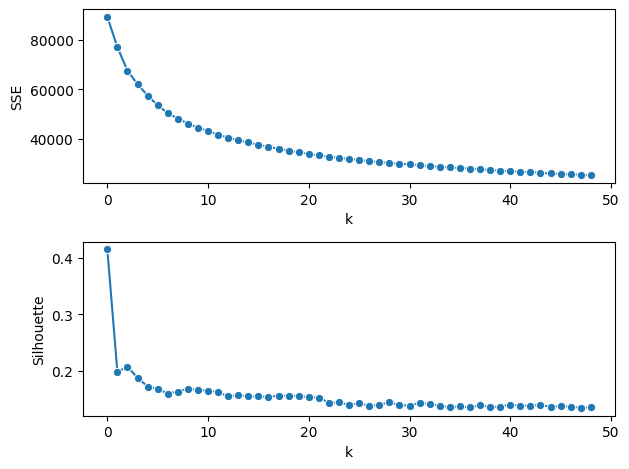

In [11]:
fig, axs = plt.subplots(2) 

sns.lineplot(x=range(len(sse_list)), y=sse_list, marker='o', ax=axs[0])
axs[0].set(xlabel='k', ylabel='SSE')

sns.lineplot(x=range(len(sil_list)), y=sil_list, marker='o', ax=axs[1])
axs[1].set(xlabel='k', ylabel='Silhouette')

plt.tight_layout()
# plt.savefig('C:\\Users\\Gagia\\Desktop\\progetto DM\\report_data_semantics\\plots\\sse_silh_kmeans.png')

## SULLA BASE DEI VALORI QUI SOPRA INIZIALIZZARE IL MODELLO CON IL NUMERO ADATTO DI K

### Inizializzazione modello

In [12]:
kmeans = KMeans(n_clusters=4, n_init=10, max_iter=100, random_state=94) #inizializziamo algoritmo, fit it per lavorare sull'exact data
#iniziamo con 3 cluster, 10 iterations, random_state: allows to have the same result 

clusters = kmeans.fit_predict(X_scal)
#kmeans.fit(X_minmax)
#kmeans.fit(D_scaled) #---> numpy array di mixed matrix tra distanze di var numeriche e var binarie (per configurazione vedere drive)

### Visualizzazione cluster
#### ---> per selezionare le feature da mettere sugli assi, chat dice di valutare la correlation matrix

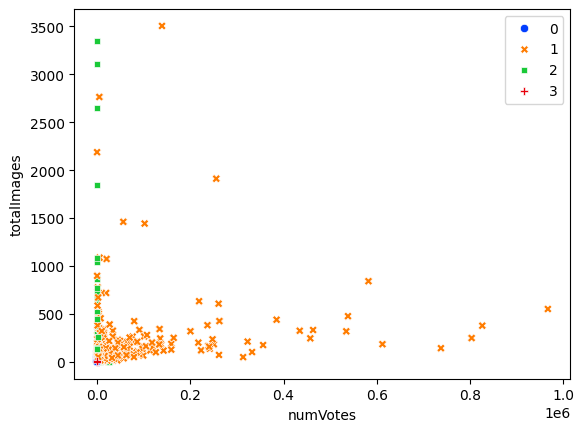


Cluster Distribution:
-------------------
Cluster 0: 8491 points (51.68%)
Cluster 1: 1219 points (7.42%)
Cluster 2: 3980 points (24.22%)
Cluster 3: 2741 points (16.68%)


In [13]:
sns.scatterplot(data=pp_train, 
                x="numVotes",
                y="totalImages",
                hue=kmeans.labels_,
                style=kmeans.labels_, #usiamo labels date da k-means
                palette="bright")
#plt.xscale("log")
#plt.yscale("log")
plt.show()

total_points = len(clusters)
unique, counts = np.unique(clusters, return_counts=True)
percentages = counts / total_points * 100

# Print summary
print("\nCluster Distribution:")
print("-------------------")
for cluster, count, percentage in zip(unique, counts, percentages):
    print(f"Cluster {cluster}: {count} points ({percentage:.2f}%)")

In [14]:
print('SSE', kmeans.inertia_) #il valore di sse che compare varia con il numero di k che scegliamo per inizializzare il metodo
print('Silhouette', silhouette_score(X_scal, kmeans.labels_))

SSE 67496.04053075211
Silhouette 0.20782538798344707


### Identificazione numero di componenti per PCA

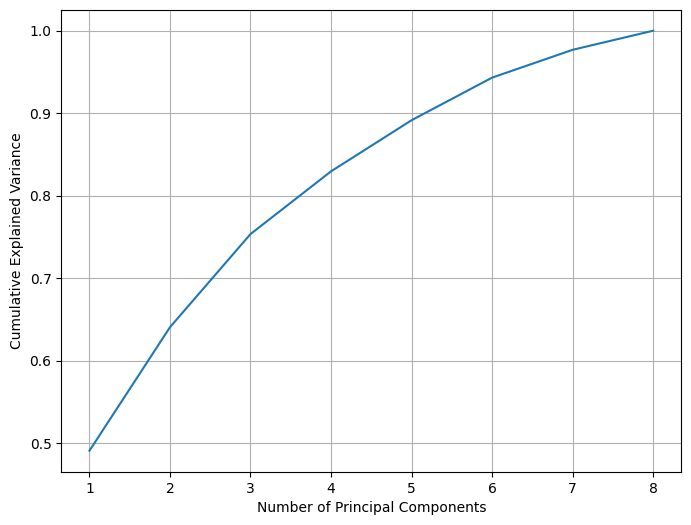

In [15]:
from sklearn.preprocessing import StandardScaler

def visualize_pca_components(df):
    # Select clustering variables ----------------------------------------------------->   'awardWins', 'totalVideos', 'awardNominationsExcludeWins',
    features = ['startYear','fill_runtimeMinutes',  'numVotes', 
                'totalImages',  'totalCredits', 'criticReviewsTotal', 
                'numRegions', 'userReviewsTotal']
    X = df[features]
    
    # Apply log transformation to handle skewness
    X = np.log1p(X)
    
    # Scale data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Perform PCA
    pca = PCA()
    pca.fit(X_scaled)
    
    # Calculate cumulative explained variance ratio
    cum_var_ratio = np.cumsum(pca.explained_variance_ratio_)
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(8, 6))
    #ax.plot(range(1, len(cum_var_ratio) + 1), cum_var_ratio, marker='o')
    ax.plot(range(1, len(cum_var_ratio) + 1), cum_var_ratio)
    plt.grid()
    ax.set_xlabel('Number of Principal Components')
    ax.set_ylabel('Cumulative Explained Variance')
    plt.show()

# Example usage
visualize_pca_components(pp_train)

# plt.savefig('C:\\Users\\Gagia\\Desktop\\progetto DM\\report_data_semantics\\plots\\pca_kmeans.png')


In [16]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def determine_pca_components(df):
    # Select clustering variables ------------------------------------------------->   
    features = ['awardWins', 'totalVideos', 'awardNominationsExcludeWins','startYear', 'fill_runtimeMinutes', 'numVotes', 
                'totalImages', 'totalCredits', 'criticReviewsTotal', 
                'numRegions', 'userReviewsTotal']
    X = df[features]
    
    # Apply log transformation to handle skewness
    X = np.log1p(X)
    
    # Scale data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Perform PCA
    pca = PCA()
    pca.fit(X_scaled)
    
    # Calculate cumulative explained variance ratio
    cum_var_ratio = np.cumsum(pca.explained_variance_ratio_)
    
    # Determine optimal number of components
    for i, ratio in enumerate(cum_var_ratio):
        if ratio >= 0.8:
            return i + 1
    
    return len(cum_var_ratio)

# Example usage
pp_train = pd.read_csv('pp_train.csv')
optimal_components = determine_pca_components(pp_train)
print(f"Optimal number of principal components: {optimal_components}")

Optimal number of principal components: 5


### Pairplot per valutare visualizzazione di clustering con numero di PC identificate come ottimali

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_su

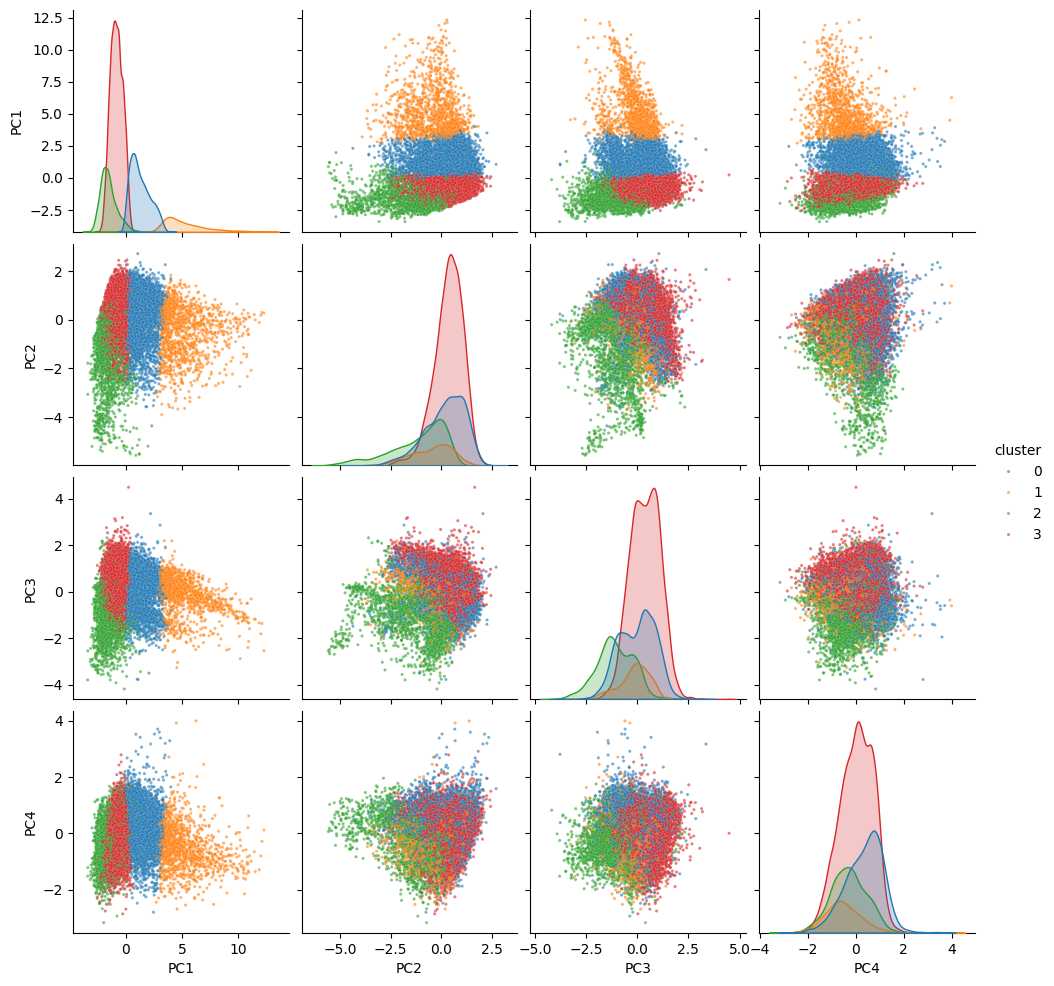

In [18]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

def plot_pca_kmeans(df, features, n_components=5, n_clusters=4):
    """
    Applica PCA e K-Means ai dati preprocessati e visualizza i risultati.

    :param df: DataFrame originale con i dati
    :param features: Lista delle feature da utilizzare
    :param n_components: Numero di componenti principali per la PCA
    :param n_clusters: Numero di cluster per il K-Means
    """
    # Preprocessamento: Log-transform e scaling
    X = df[features].copy()
    X = np.log1p(X)  # Log-transform
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Applica PCA
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)

    # Crea un DataFrame con le componenti principali
    pca_columns = [f"PC{i+1}" for i in range(n_components)]
    pca_df = pd.DataFrame(X_pca, columns=pca_columns)

    # Applica K-Means sui dati preprocessati (X_scaled)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)

    # Aggiungi i cluster come colonna al DataFrame delle componenti principali
    pca_df['cluster'] = clusters

    # Visualizza un pairplot delle prime 3 componenti principali colorate per cluster
    # sns.pairplot(
    #     data=pca_df,
    #     vars=["PC1", "PC2", "PC3", "PC4"],  #--------------------------------------------> 
    #     hue="Cluster",               # Colora in base ai cluster
    #     diag_kind="kde",             # Distribuzione kernel sulle diagonali
    #     palette="tab10"              # Palette di colori per i cluster
    # )
    sns.pairplot(
        data=pca_df,
        vars=["PC1", "PC2", "PC3", "PC4"],
        hue="cluster",
        diag_kind="kde",
        palette="tab10",
        plot_kws={"s": 5, "alpha": 0.6, 'linewidth':0.1},
    )

    plt.show()

# Esempio di utilizzo ----------------------------------------------------------------->  "awardWins", "totalVideos", "awardNominationsExcludeWins",
features = [
   "startYear",  "numVotes", "totalImages", 
    "totalCredits", "criticReviewsTotal", 
    "numRegions", "userReviewsTotal", "fill_runtimeMinutes"
]

# Supponendo che il DataFrame originale sia chiamato `df`
plot_pca_kmeans(pp_train, features, n_components=4, n_clusters=4) #-------------------------------------->giocare un po' con questi parametri


# plt.savefig('C:\\Users\\Gagia\\Desktop\\progetto DM\\report_data_semantics\\plots\\pairplot_kmeans.png')


## SECONDO CLAUDE, LA CONFIGURAZIONE MIGLIORE E' QUELLA OTTENUTA FACENDO UNA CLUSTERING ANALYSIS ESCLUDENDO LE VAR CON TANTI ZERI ("awardWins", "totalVideos", "awardNominationsExcludeWins") E SCEGLIENDO UN K = 4

### Identify the distribution of titleTypes across clusters ----> DA SISTEMARE SE VOGLIAMO METTERLO NEL REPORT

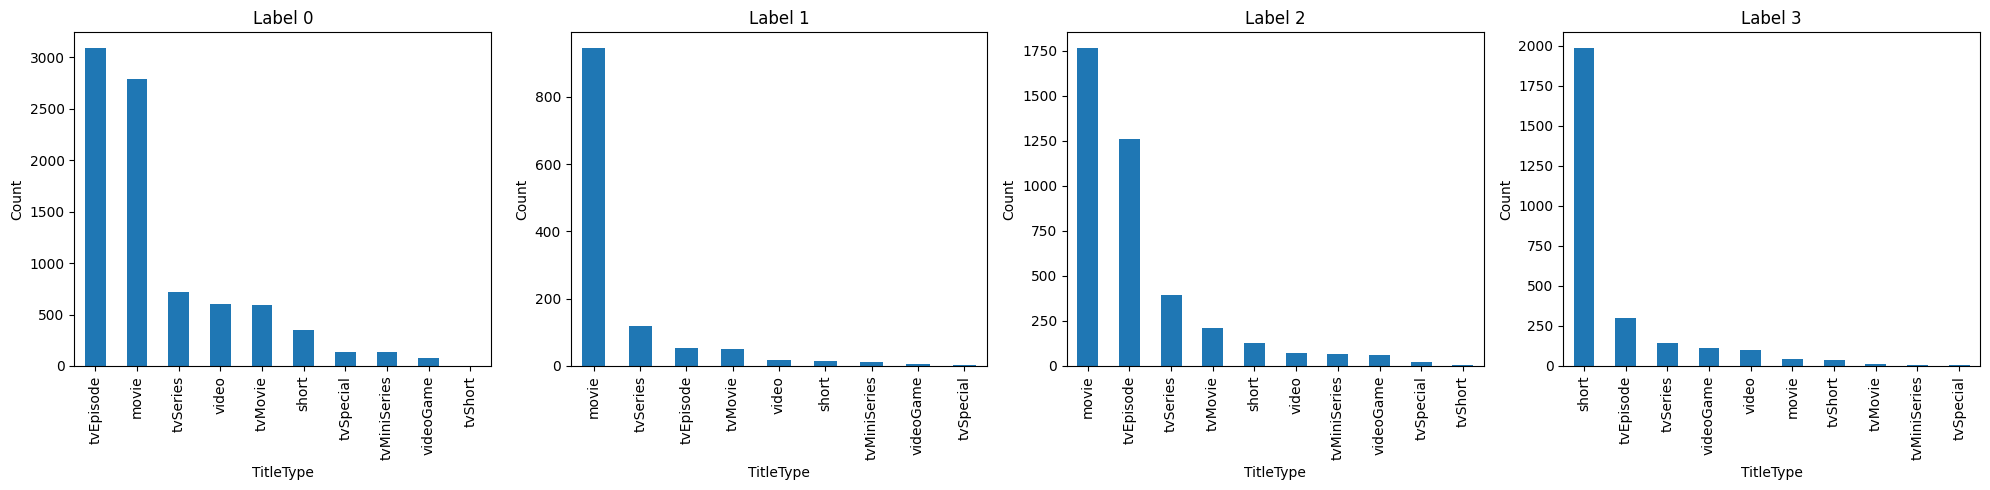

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with subplots for each cluster
fig, axes = plt.subplots(1, 4, figsize=(20, 5))  # Adjust figure size as needed

# For each cluster
for i in range(4):
    # Count titleType frequencies for this cluster
    title_counts = pp_train[clusters == i]['titleType'].value_counts()
    
    # Create bar plot in the corresponding subplot
    ax = axes[i]
    title_counts.plot(kind='bar', ax=ax)
    
    # Customize subplot
    ax.set_title(f'Label {i}')
    ax.set_xlabel('TitleType')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x')  # Rotate x labels for better readability

# Adjust layout to prevent label overlap
plt.tight_layout()
plt.show()

### Identificazione dei centroidi

In [20]:
kmeans.cluster_centers_ #coordinates with centroids

array([[ 1.41725543e-01, -4.76894994e-01, -4.39549315e-01,
        -6.59273749e-02, -3.95090576e-01, -3.35834254e-01,
        -4.71537838e-01,  2.54565665e-01],
       [-1.07045256e-01,  2.16754506e+00,  1.83103968e+00,
         1.14528219e+00,  2.60109429e+00,  2.28207834e+00,
         2.52505347e+00,  7.42429764e-01],
       [ 1.73993779e-03,  7.24478092e-01,  6.69446125e-01,
         5.97954330e-01,  3.21501722e-01,  3.22032572e-01,
         4.68099810e-01,  3.18489195e-01],
       [-3.91762140e-01, -5.38805252e-01, -4.25204852e-01,
        -1.16917041e+00, -3.99948874e-01, -4.41979114e-01,
        -3.42796585e-01, -1.57390612e+00]])

In [21]:
centers = scaler.inverse_transform(kmeans.cluster_centers_) #from normalized to input domain
centers

array([[  7.54910032,  -3.92609009,  -3.58757768,  -0.63713211,
         -2.48132521,  -0.50086048,  -4.0802743 ,   2.03823112],
       [  7.53048481,  27.78007285,  14.9448466 ,  11.06818014,
         16.33590175,   8.80672997,  21.84959504,   5.94441302],
       [  7.5386252 ,  10.47806733,   5.46398299,   5.77872099,
          2.01915808,   1.83808506,   4.05052463,   2.5500477 ],
       [  7.50917945,  -4.66837832,  -3.47049895, -11.29903949,
         -2.51183724,  -0.87824241,  -2.96626057, -12.60179545]])

In [22]:
pp_train['kmeans_labels'] = kmeans.labels_
pp_train['kmeans_labels'] = pp_train['kmeans_labels'].map({0:"A", 1: "B", 2: "C"})

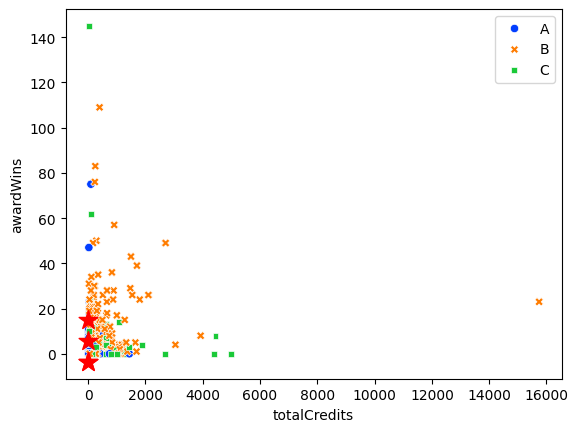

In [23]:
sns.scatterplot(data=pp_train, 
                x="totalCredits", 
                y="awardWins", 
                hue='kmeans_labels', 
                style='kmeans_labels',
                palette="bright", 
                hue_order=["A", "B", "C"]
               )
plt.legend()
#qui è giusto che centers sia :,1 se in quello di fedele dice [:,2]?
plt.scatter(centers[:,0], centers[:,2], c='red', marker='*', s=200) #plotting the centroids
plt.show()

#### Mapping della variabile target (per noi è titleType volendo) così da confrontarla dopo con gli eventuali cluster/individuare quali cluster contengono un'alta percentuale di quale categoria di titleType

In [24]:
y = np.array(pp_train['titleType'])
y_map = {"tvEpisode": 0, "videoGame": 1, "movie": 2, "tvSeries": 3, "video": 4,
         "tvMiniSeries": 5, "short": 6, "tvMovie": 7, "tvSpecial": 8, "tvShort": 9}

y_mapped = pd.DataFrame(y).iloc[:,0].map(y_map) #target label

### Confronto con target variable

In [25]:
y_mapped

0        0
1        1
2        2
3        3
4        3
        ..
16426    2
16427    2
16428    2
16429    2
16430    6
Name: 0, Length: 16431, dtype: int64

In [26]:
y_mapped.groupby(pp_train['kmeans_labels']).value_counts(normalize=True)
#qui si vede quanta percentuale di titleType (i numeri da 0 a 9) appartiene a quale cluster (A, B, C)

kmeans_labels  0
A              0    0.363679
               2    0.328112
               3    0.084678
               4    0.070781
               7    0.069956
               6    0.040867
               8    0.016135
               5    0.016017
               1    0.009540
               9    0.000236
B              2    0.774405
               3    0.096801
               0    0.044299
               7    0.041838
               4    0.014766
               6    0.011485
               5    0.009844
               1    0.004922
               8    0.001641
C              2    0.443216
               0    0.316332
               3    0.099497
               7    0.052764
               6    0.032412
               4    0.017839
               5    0.016834
               1    0.015075
               8    0.005276
               9    0.000754
Name: proportion, dtype: float64

## TENTATIVO BISECTING K-MEANS

In [27]:
from sklearn.cluster import BisectingKMeans

In [28]:
bkmeans = BisectingKMeans(n_clusters=4)
bkmeans.fit(X_scal)

BisectingKMeans(n_clusters=4)

<Axes: xlabel='numVotes', ylabel='userReviewsTotal'>

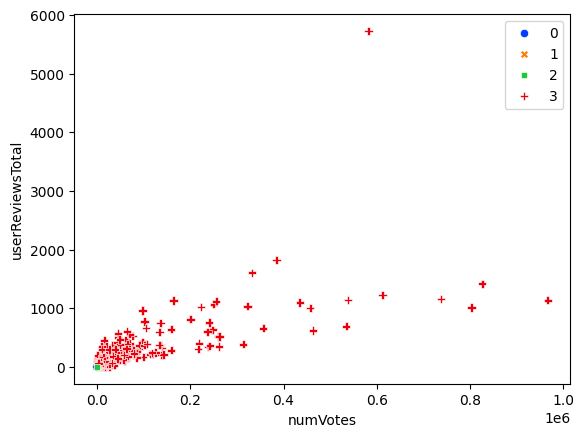

In [29]:
sns.scatterplot(data=pp_train, x="numVotes", y="userReviewsTotal", hue=bkmeans.labels_, 
                palette="bright", style=bkmeans.labels_)

## TENTATIVO X-MEANS

In [30]:
#!pip install pyclustering

In [31]:
# standard installation might result in error due to numpy warnings (numpy > 1.24.0)
# pip install https://github.com/KulikDM/pyclustering/archive/Warning-Fix.zip

In [ ]:
from pyclustering.cluster import xmeans

ModuleNotFoundError: No module named 'pyclustering'

: 

In [ ]:
xm = xmeans.xmeans(X_scal)
xm.process()

AttributeError: module 'numpy' has no attribute 'warnings'

In [ ]:
clusters = xm.get_clusters()

In [ ]:
def clusters_to_labels(clusters):
    labels = np.empty(shape=(len(np.concatenate(clusters))), dtype=int)
    for i in range(len(clusters)):
        for idx in clusters[i]:
            labels[idx] = i
    return labels

In [ ]:
labels = clusters_to_labels(clusters)

In [ ]:
centers = np.array(xm.get_centers())
centers_unscaled = scaler.inverse_transform(centers)

In [ ]:
sns.scatterplot(data=df, x="mean radius", y="mean concave points", hue=labels, palette="bright", style=labels)
plt.scatter(centers_unscaled[:, 0], centers_unscaled[:,7], color="black", marker="*", s=100)